In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import cross_decomposition
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set()

In [60]:
#Combined all the csv data files we had into a single csv files and added an extra column with currency name.

import pandas as pd
import csv
import glob
import os
path = '.'
file_list = list()
for file in os.listdir(path):
    if file.endswith('.csv'):
        df = pd.read_csv(file)
        split_file=file.split('-',1)[0]
        df['currency'] = split_file
        file_list.append(df)
        df.to_csv('out.csv', mode='a')

In [61]:
data = pd.read_csv('out.csv')
data.Volume.replace('Volume',0)
#Converted objects to float
data["Volume"] = pd.to_numeric(data.Volume, errors='coerce')
data["High"] = pd.to_numeric(data.High, errors='coerce')
data["Low"] = pd.to_numeric(data.Low, errors='coerce')
data["Open"] = pd.to_numeric(data.Open, errors='coerce')
data["Close"] = pd.to_numeric(data.Close, errors='coerce')
data["Date"] = pd.to_datetime(data.Date, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11285 entries, 0 to 11284
Data columns (total 9 columns):
Unnamed: 0    11276 non-null float64
Date          11276 non-null datetime64[ns]
High          11276 non-null float64
Low           11276 non-null float64
Open          11276 non-null float64
Close         11276 non-null float64
Volume        11276 non-null float64
Adj Close     11285 non-null object
currency      11285 non-null object
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 705.4+ KB


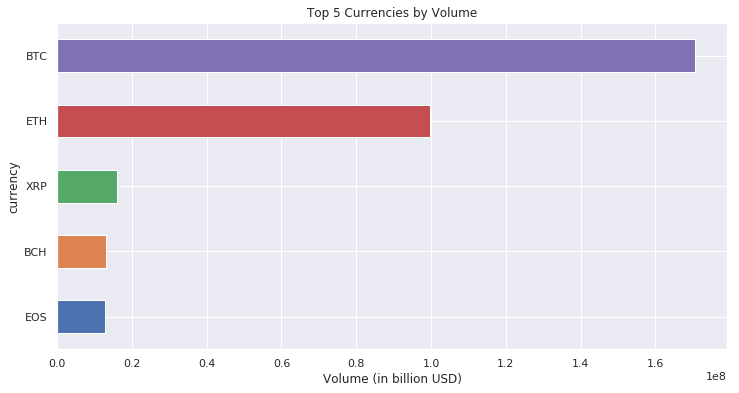

In [62]:
#TOP 5 CRYPTOCUURENCIES BASED ON THEIR VOLUME IN 2018.

plt.figure(figsize=(12,6))
ax = data.groupby(['currency'])['Volume'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh');
ax.set_xlabel("Volume (in billion USD)");
plt.title("Top 5 Currencies by Volume");


According to the volumes of the different crypto currencies bitcoin has the highest volume.
Also there is a great difference in volume ranges when we compare bitcoin with rest of the currencies.

/home/chetana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


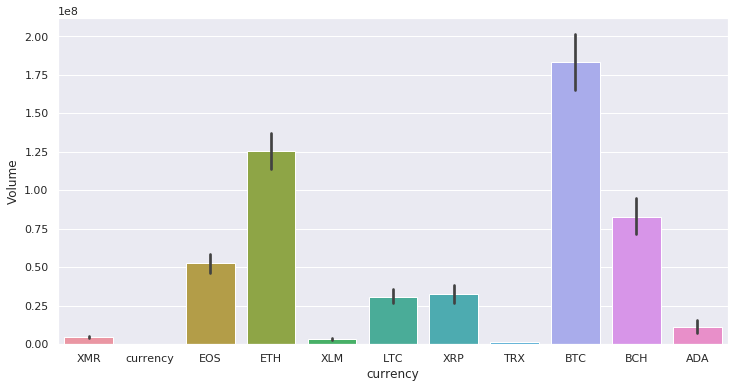

In [63]:
#CURRENCIES AND THEIR VOLUMES

plt.figure(figsize=(12,6))
sns.barplot(x='currency', y='Volume', data=data, estimator=np.mean)

<Figure size 864x432 with 0 Axes>

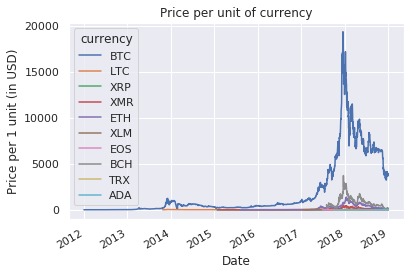

In [64]:
#TREND CHARTS OF THE CURRENCIES

plt.figure(figsize=(12,6))
trend = data.groupby(['Date', 'currency'])['Close'].mean().unstack().plot();
trend.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

Here we tried to do an analysis on the data to find out the trend of cryptocurrency prices.
1.We can see that the cryptocurrency prices has increased mainly in the year 2018.
2.Bitcoin price has increased tremendously in the year 2018.It has increased to 20000 usd in 2018 and then started to decrease eventually in 2019

<Figure size 864x432 with 0 Axes>

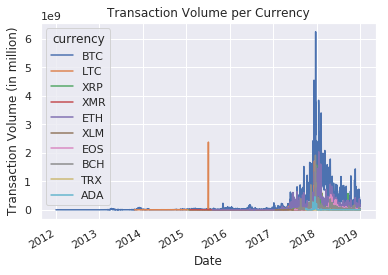

In [65]:
#TREND CHART OF CURRENCIES BY THEIR VOLUME

plt.figure(figsize=(12,6))
trend_vol = data.groupby(['Date', 'currency'])['Volume'].mean().unstack().plot();
trend_vol.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency");

Here we tried to check the trend of cryptocurrencies according to the volume  and this is also similar to the price trend that we implemented earlier

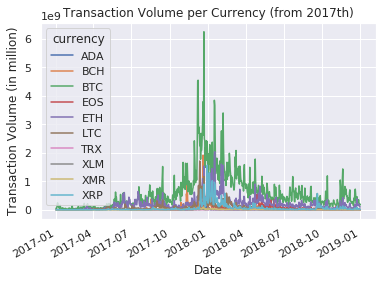

In [66]:
#TREND FROM 2017

trend_2018 = data[data.Date.dt.year >= 2017].groupby(['Date', 'currency'])['Volume'].mean().unstack().plot();
trend_2018.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency (from 2017th)");


From the above analysis we knew that there is a increase in price of cryptocurrencies in the year 2018 .So, we tried to find out which particular time of the year did the increase in price started.So from the above analysis we can see that the increase in transaction volume of cryptocurrenices started from 2017 october and continued till 2018 april.

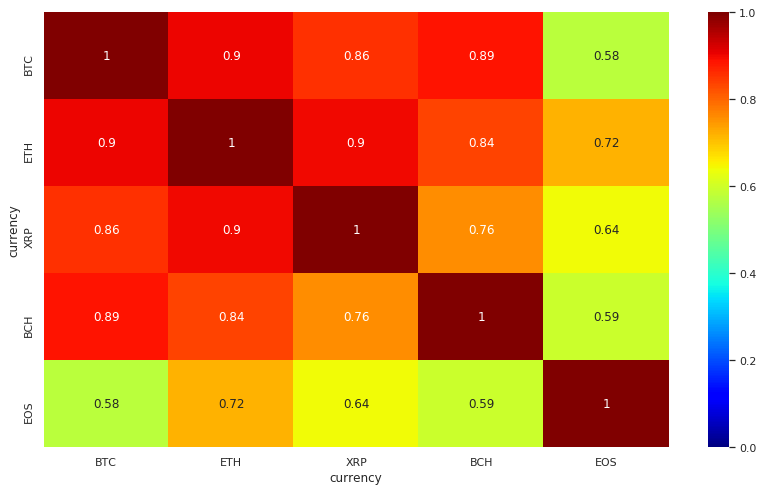

In [67]:
#PEARSON CORRELATION BETWEEN TOP 5 CRYPTO CURRENCIES.

rel_format = data.groupby(['Date', 'currency'])['Close'].last().unstack()
top5_currency_names = data.groupby(['currency'])['Volume'].last().sort_values(ascending=False).head(5).index
data_top5_currencies = data[data['currency'].isin(top5_currency_names)]
data_top5_currencies.head(5)
plt.figure(figsize=(14,8))
sns.heatmap(rel_format[top5_currency_names].corr(method='pearson'),vmin=0, vmax=1, cmap='jet', annot=True);


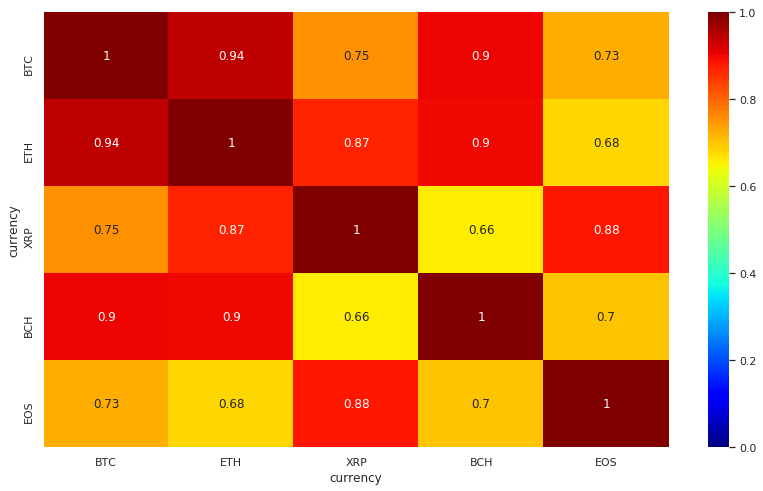

In [68]:
#SPEARMAN CORRELATION BETWEEN TOP 5 CRYPTO CURRENCIES.

rel_format = data.groupby(['Date', 'currency'])['Close'].last().unstack()
top5_currency_names = data.groupby(['currency'])['Volume'].last().sort_values(ascending=False).head(5).index
data_top5_currencies = data[data['currency'].isin(top5_currency_names)]
data_top5_currencies.head(5)
plt.figure(figsize=(14,8))
sns.heatmap(rel_format[top5_currency_names].corr(method='spearman'),vmin=0, vmax=1, cmap='jet', annot=True);

We have performed Pearson and spearman correlation between top 5 cryptocurrencies and we can notice that there is a slight increase in correlation values generated by spearman when compared to pearson.
In both the cases Bitcoin is highly correlated to etherium.

<Figure size 864x432 with 0 Axes>

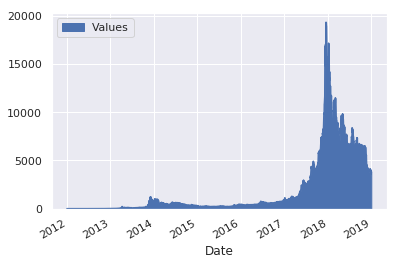

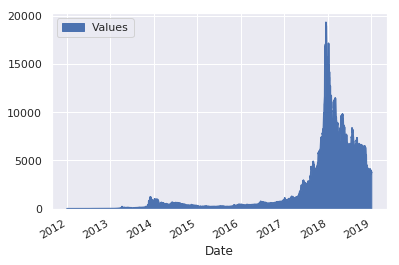

In [69]:
#FROM ALL THE ABOVE WE CAME TO KNOW THAT BTC I.E BITCOIN IS THE MOST TRENDING. IN THIS WE TRIED TO PLOT THE BITCOIN TRENDINGS 
#DEPENDING OPEN THEIR OPEN AND CLOSE PRICES.

btc_data= data[data['currency']=='BTC']
btc_open= pd.DataFrame({'Date':btc_data['Date'] ,'Values':btc_data['Open']})
btc_open.sort_values(by='Date', inplace=True, ascending=True)
btc_closed= pd.DataFrame({'Date':btc_data['Date'] ,'Values':btc_data['Close']})
btc_closed.sort_values(by='Date', inplace=True, ascending=True)
plt.figure(figsize=(12,6))
btc_open.plot(x='Date', y='Values', kind='area')
btc_closed.plot(x='Date', y='Values', kind='area')


0.5222960600483475


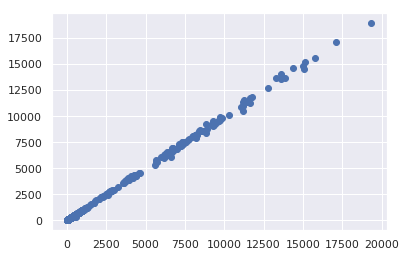

In [70]:
#TRYING TO PREDICT WHICH FACTORS INFLUENCE THE CLOSING PRICE FOR BITCOIN

X=btc_data[['Open','High', 'Low', 'Volume']]
y=btc_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm=LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_) 
lm.coef_
c_df=pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
predictions=lm.predict(X_test)
plt.scatter(y_test, predictions)